### Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from urllib import request

In [2]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

from dont_patronize_me import DontPatronizeMe
dpm = DontPatronizeMe('./data', 'dontpatronizeme_pcl.tsv')

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [3]:
# Define the paths
DATA_PATH = "./data/dontpatronizeme_pcl.tsv"
TRAIN_LABELS_PATH = "./data/train_semeval_parids-labels.csv"
DEV_LABELS_PATH = "./data/dev_semeval_parids-labels.csv"

In [4]:
# Load data
pcl_data = pd.read_csv(DATA_PATH, sep="\t", header=None, skiprows=3)
train_labels = pd.read_csv(TRAIN_LABELS_PATH, sep=",")
dev_labels = pd.read_csv(DEV_LABELS_PATH, sep=",")

In [5]:
# Some basic information about the data
print('#'*50)
print('PCL Data')
print('#'*50)
print(pcl_data.info())
print('#'*50)
print('Train Labels')
print('#'*50)
print(train_labels.info())
print('#'*50)
print('Dev Labels')
print('#'*50)
print(dev_labels.info())

##################################################
PCL Data
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10469 non-null  int64 
 1   1       10469 non-null  object
 2   2       10469 non-null  object
 3   3       10469 non-null  object
 4   4       10468 non-null  object
 5   5       10469 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 490.9+ KB
None
##################################################
Train Labels
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8375 entries, 0 to 8374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   par_id  8375 non-null   int64 
 1   label   8375 non-null   object
dtypes: int64(1), object(1)
memory usage: 131.0+ KB
None
##############

In [6]:
# Get the data form of task 1
dpm.load_task1()
pcl_data = dpm.train_task1_df
pcl_data['text'] = pcl_data['text'].dropna()
print('PCL Data')
print('#'*50)
print(pcl_data.info())
print('#'*50)
print(pcl_data.head())

PCL Data
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   par_id      10469 non-null  object
 1   art_id      10469 non-null  object
 2   keyword     10469 non-null  object
 3   country     10469 non-null  object
 4   text        10469 non-null  object
 5   label       10469 non-null  int64 
 6   orig_label  10469 non-null  object
dtypes: int64(1), object(6)
memory usage: 572.7+ KB
None
##################################################
  par_id      art_id    keyword country  \
0      1  @@24942188   hopeless      ph   
1      2  @@21968160    migrant      gh   
2      3  @@16584954  immigrant      ie   
3      4   @@7811231   disabled      nz   
4      5   @@1494111    refugee      ca   

                                                text  label orig_label  
0  We 're living in times of abs

In [7]:
# Get the train and dev data
# Extract the par_ids from the data
def extract_data(data, labels):
    rows = []
    for idx in range(len(labels)):
        par_id = labels.par_id[idx]
        keyword = data.loc[data.par_id == par_id].keyword.values[0]
        text = data.loc[data.par_id == par_id].text.values[0]
        label = data.loc[data.par_id == par_id].label.values[0]

        rows.append({
            'par_id': par_id,
            'keyword': keyword,
            'text': text,
            'label': label
        })
    return pd.DataFrame(rows)

# In order to remain the dev data for final testing, we will split the train data into train and val data
train_labels.par_id = train_labels.par_id.astype(str)
dev_labels.par_id = dev_labels.par_id.astype(str)

train_data = extract_data(pcl_data, train_labels)
test_data = extract_data(pcl_data, dev_labels)

# Split the train data into train and val data
train_data, val_data = train_test_split(train_data, test_size=int(len(test_data) / 2), random_state=42, stratify=train_data['label'])
print(f"Train data: {len(train_data)}")
print(f"Val data: {len(val_data)}")
print(f"Dev data: {len(test_data)}")

if len(pcl_data) == len(train_data) + len(val_data) + len(test_data):
    print("Data split successfully!")
else:
    print("Data split failed!")

Train data: 7328
Val data: 1047
Dev data: 2094
Data split successfully!


In [8]:
# Clear out the None values
def clear_none(data):
    for idx, row in data.iterrows():
        if row.text == "":
            data.drop(idx, inplace=True)

clear_none(train_data)
clear_none(val_data)
clear_none(test_data)

print(f"Train data: {len(train_data)}")
print(f"Val data: {len(val_data)}")
print(f"Test data: {len(test_data)}")

Train data: 7328
Val data: 1047
Test data: 2093


In [9]:
# Save the split data
train_data.to_csv("./data/train_data.csv", index=False)
val_data.to_csv("./data/val_data.csv", index=False)
test_data.to_csv("./data/test_data.csv", index=False)

print("Data saved successfully!")
print("-"*50)
print(f"Train data:\n {train_data.head()}")
print("-"*50)
print(f"Val data:\n {val_data.head()}")
print("-"*50)
print(f"Test data:\n {test_data.head()}")

Data saved successfully!
--------------------------------------------------
Train data:
      par_id   keyword                                               text  \
4932   4577  disabled  Miller , out since straining his left hamstrin...   
4987   4636   in-need  The prologue talks about four friends , who ar...   
4759   4391  disabled  He said the home for disabled children relied ...   
7054   6924  hopeless  Richard was referring to the Battle of Greece ...   
4041   3597     women  It is thought that he may have been involved o...   

      label  
4932      0  
4987      0  
4759      0  
7054      0  
4041      0  
--------------------------------------------------
Val data:
      par_id  keyword                                               text  label
6445   6251    women  Far Eastern University rallied from a set down...      0
1286    548  refugee  """ At the moment we do not have plans to rece...      0
1722   1041    women  For example , a business selling a product aim...

## New data analysis below

Keywords:
keyword
migrant       1089
in-need       1082
vulnerable    1080
homeless      1077
women         1070
Name: count, dtype: int64


/var/folders/fc/888tw9012rs4lbbk1k185yg80000gn/T/ipykernel_42941/1537853133.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_counts.index[:], y=keyword_counts.values[:], palette='coolwarm')


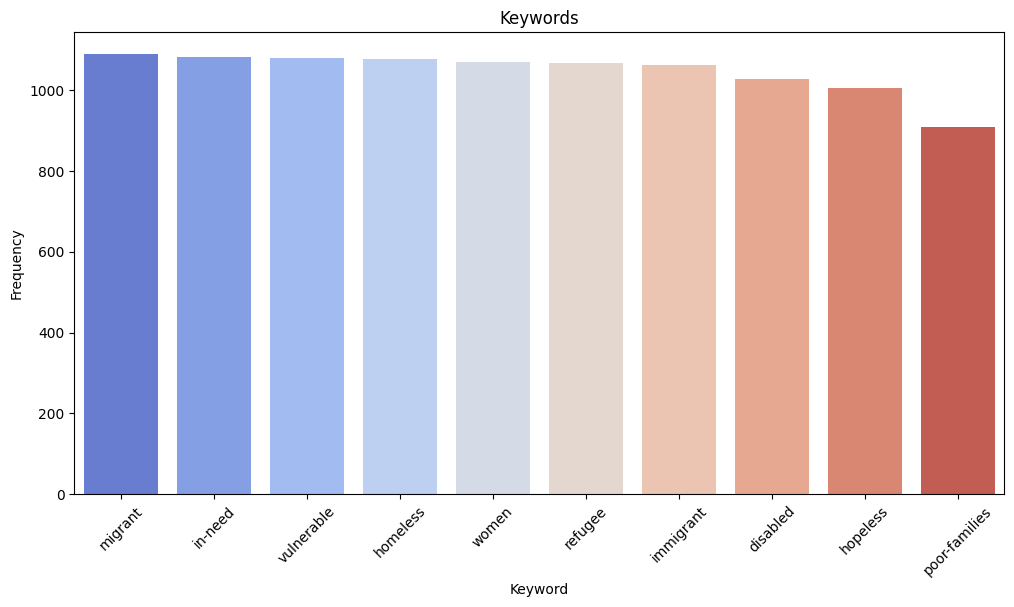

In [14]:
# Get the frequency of each keyword in the dataframe
keyword_counts = pcl_data['keyword'].value_counts()

# Print the top 10 most common keywords
print("Keywords:")
print(keyword_counts.head())

# Plot the keyword distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_counts.index[:], y=keyword_counts.values[:], palette='coolwarm')
plt.title('Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Counts of label=0 vs. label=1 for each keyword:
label         0    1
keyword             
disabled    947   81
homeless    899  178
hopeless    881  124
immigrant  1031   30
in-need     906  176


<Figure size 600x300 with 0 Axes>

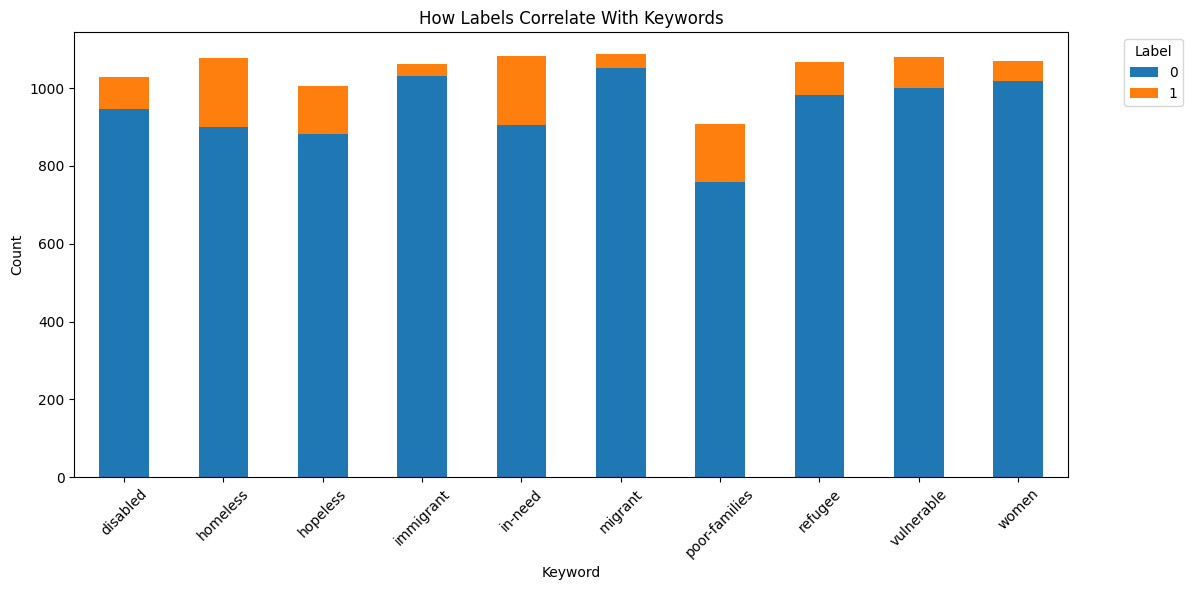

In [42]:
# Group by (keyword, label) and count occurrences
label_keyword_counts = pcl_data.groupby(["keyword", "label"]).size().unstack(fill_value=0)

print("Counts of label=0 vs. label=1 for each keyword:")
print(label_keyword_counts.head())  # Just showing top 10 for brevity

plt.figure(figsize=(6,3))
ax = label_keyword_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6)
)

ax.set_title("How Labels Correlate With Keywords")
ax.set_xlabel("Keyword")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Place the legend outside the plot area (to the right, in the upper-left corner of that 'box')
ax.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# label_keyword_counts.plot(kind="bar", figsize=(12,6), colormap="coolwarm")
# plt.title("Keyword vs. Label Distribution (Grouped)")
# plt.xlabel("Keyword")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.legend(title="Label")
# plt.tight_layout()
# plt.show()



In [27]:
# Compute proportion of label=1 out of total for each keyword
label_keyword_props = label_keyword_counts.apply(
    lambda row: row[1] / (row[0] + row[1]) if (row[0] + row[1]) > 0 else 0,
    axis=1
)

# Sort by proportion of label=1 descending
label_keyword_props = label_keyword_props.sort_values(ascending=False)

print("\nProportion of label=1 (PCL) by keyword (top 10):")
print(label_keyword_props.head(10))




Proportion of label=1 (PCL) by keyword (top 10):
keyword
homeless         0.165274
poor-families    0.165017
in-need          0.162662
hopeless         0.123383
refugee          0.080524
disabled         0.078794
vulnerable       0.074074
women            0.048598
migrant          0.033058
immigrant        0.028275
dtype: float64


Label distribution in training set:
label
0    6633
1     695
Name: count, dtype: int64


/var/folders/fc/888tw9012rs4lbbk1k185yg80000gn/T/ipykernel_42941/4068069100.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_data, palette='viridis')


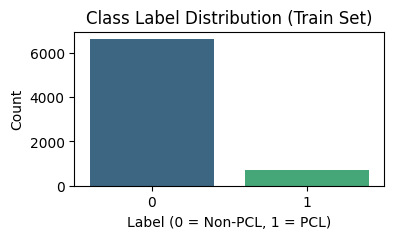


Percentage distribution of labels:
label
0    90.51583
1     9.48417
Name: count, dtype: float64


In [39]:
# Count how many 0’s vs. 1’s are in the training set
label_counts = train_data['label'].value_counts()
print("Label distribution in training set:")
print(label_counts)

# Plot as a bar chart
plt.figure(figsize=(4,2))
sns.countplot(x='label', data=train_data, palette='viridis')
plt.title("Class Label Distribution (Train Set)")
plt.xlabel("Label (0 = Non-PCL, 1 = PCL)")
plt.ylabel("Count")
plt.show()


label_percentage = (label_counts / label_counts.sum()) * 100
print("\nPercentage distribution of labels:")
print(label_percentage)

In [41]:
# Create a new column with text length = number of words (split by whitespace)
train_data['text_length'] = train_data['text'].apply(lambda x: len(str(x).split()))

# Group by label and compute mean, median, std, etc. of text_length
length_stats_by_label = train_data.groupby('label')['text_length'].describe() 
# Round and convert all columns to int
length_stats_by_label = length_stats_by_label.round(0).astype(int)

print("\nText length statistics by label:")
print(length_stats_by_label)



Text length statistics by label:
       count  mean  std  min  25%  50%  75%  max
label                                           
0       6633    48   29    1   30   42   60  909
1        695    53   35    6   33   46   66  512


/var/folders/fc/888tw9012rs4lbbk1k185yg80000gn/T/ipykernel_42941/3077214061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=train_data, palette='viridis')


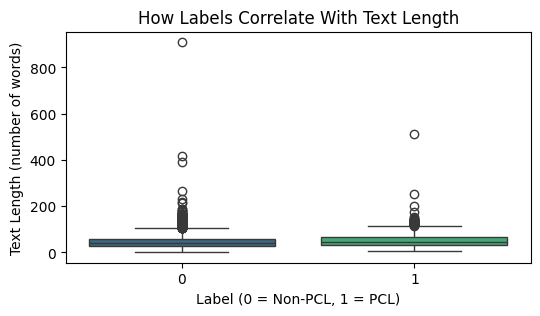

In [40]:
plt.figure(figsize=(6,3))
sns.boxplot(x='label', y='text_length', data=train_data, palette='viridis')
plt.title("How Labels Correlate With Text Length")
plt.xlabel("Label (0 = Non-PCL, 1 = PCL)")
plt.ylabel("Text Length (number of words)")
plt.show()


/var/folders/fc/888tw9012rs4lbbk1k185yg80000gn/T/ipykernel_42941/1198723492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='text_length', data=train_data, palette='viridis', cut=0)


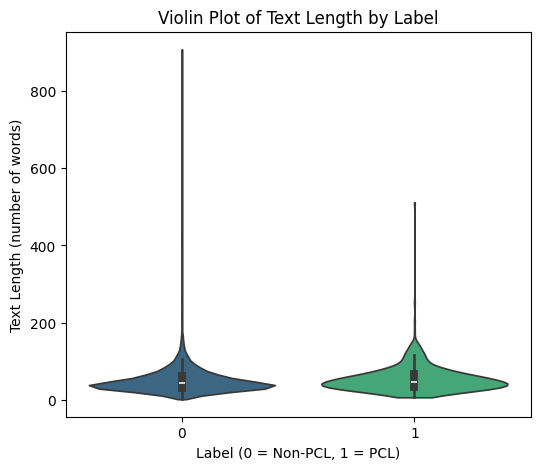

In [ ]:
plt.figure(figsize=(6,5))
sns.violinplot(x='label', y='text_length', data=train_data, palette='viridis', cut=0)
plt.title("Violin Plot of Text Length by Label")
plt.xlabel("Label (0 = Non-PCL, 1 = PCL)")
plt.ylabel("Text Length (number of words)")
plt.show()


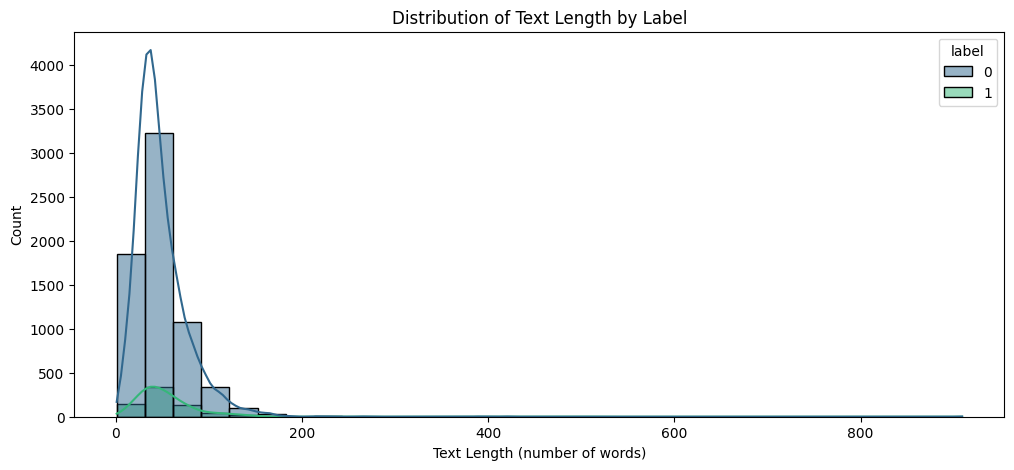

In [36]:
plt.figure(figsize=(12,5))
sns.histplot(
    data=train_data, 
    x="text_length", 
    hue="label", 
    bins=30, 
    kde=True,
    palette="viridis",
    alpha=0.5
)
plt.title("Distribution of Text Length by Label")
plt.xlabel("Text Length (number of words)")
plt.ylabel("Count")
plt.show()